In [112]:
# Importar los paquetes principales

!pip install biopython 
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo
from Bio import Entrez 

In [109]:
# Cargar el Accesion list de la búsqueda realizada en el NCBI
# gen de interés: CSF1R
import pandas as pd 
genfile = pd.read_table('CSF1R.seq')
genfile

,AB457039.1
0,AB526448.1
1,AB546838.1
2,AF056985.1
3,AF056986.1
4,AF056987.1
...,...
1502,XM_046460474.1
1503,XM_046665254.1
1504,XM_546306.7
1505,XR_001310203.1


In [63]:
# Descargar la data tipo genbank utilizando los diez primeros IDs de accesión
id_list = ["AB457039.1","AB526448.1","AB546838.1","AF056985.1","AF056986.1","AF056987.1","AF056988.1","AF056989.1","AF056990.1","AF056991.1"]
Entrez.email = "kerly.diaz@est.ikiam.edu.ec"
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= id_list
                  ) as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        print("%s %s..." % (seq_record.id, seq_record.description[:50]))
        print("Sequence length %i, %i features, from: %s" % ( len(seq_record), 
                                                              len(seq_record.features), 
                                                              seq_record.annotations["source"], ) )

AB457039.1 Paralichthys olivaceus csf1r mRNA for colony stimu...
Sequence length 762, 3 features, from: Paralichthys olivaceus (Japanese flounder)
AB526448.1 Cyprinus carpio M-CSFR mRNA for macrophage colony-...
Sequence length 1495, 3 features, from: Cyprinus carpio (common carp)
AB546838.1 Paralichthys olivaceus csf1r mRNA for colony stimu...
Sequence length 714, 3 features, from: Paralichthys olivaceus (Japanese flounder)
AF056985.1 AF056985 Chromosome 5q33 transcripts Homo sapiens ...
Sequence length 181, 1 features, from: Homo sapiens (human)
AF056986.1 AF056986 Chromosome 5q33 transcripts Homo sapiens ...
Sequence length 132, 1 features, from: Homo sapiens (human)
AF056987.1 AF056987 Chromosome 5q33 transcripts Homo sapiens ...
Sequence length 300, 1 features, from: Homo sapiens (human)
AF056988.1 AF056988 Chromosome 5q33 transcripts Homo sapiens ...
Sequence length 166, 1 features, from: Homo sapiens (human)
AF056989.1 AF056989 Chromosome 5q33 transcripts Homo sapiens ...
Sequen

In [64]:
print(handle.url)

https://eutils.ncbi.nlm.nih.gov/entrez/eutils/efetch.fcgi?db=nucleotide&rettype=gb&retmode=text&id=AB457039.1%2CAB526448.1%2CAB546838.1%2CAF056985.1%2CAF056986.1%2CAF056987.1%2CAF056988.1%2CAF056989.1%2CAF056990.1%2CAF056991.1&tool=biopython&email=kerly.diaz%40est.ikiam.edu.ec


In [65]:
# Árbol filogenético 
# Alineamiento de secuencias
# Primero: Importar modulos
from Bio.Align.Applications import ClustalwCommandline
import os

In [66]:
# Segundo: Transformacion de tipos de archivos
records = SeqIO.parse("sequence.gb", "genbank") 
count = SeqIO.write(records, "sequence.fasta", "fasta") 
print("Converted %i records" % count)

Converted 10 records


In [67]:
# Tercero: Cargar data multiple y crear alineamientos
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe" 
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "sequence.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=sequence.fasta


In [68]:
# Cuarto: Leer alineamiento
ClustalAlign = AlignIO.read("sequence.aln", "clustal")
print(ClustalAlign)

Alignment with 10 rows and 1741 columns
--------------------------------------------...--- AB457039.1
CTCACCGCGGTCTGTCCATCGAGGTTAACGAAGGCGAAGATGTG...--- AB526448.1
--------------------------------------------...CCA AB546838.1
--------------------------------------------...--- AF056990.1
--------------------------------------------...--- AF056986.1
--------------------------------------------...--- AF056985.1
--------------------------------------------...--- AF056987.1
--------------------------------------------...--- AF056991.1
--------------------------------------------...--- AF056988.1
--------------------------------------------...--- AF056989.1


In [9]:
# Quinto: Generar Dendogram (Tree)
tree = Phylo.read("sequence.dnd", "newick")
Phylo.draw_ascii(tree)

                                             _______________ AB457039.1
                                    ________|
          _________________________|        |___________________ AB526448.1
         |                         |
  _______|                         |___________________________ AB546838.1
 |       |
 |       |__________________________________________________ AF056990.1
 |
 |         ______________________________________________________ AF056985.1
 |      __|
 |   __|  |_______________________________________________________ AF056987.1
_|  |  |
 |__|  |______________________________________________________ AF056986.1
 |  |
 |  |___________________________________________________________ AF056991.1
 |
 |____________________________________________________________ AF056989.1
 |
 |_____________________________________________________________ AF056988.1



In [69]:
! pip install PyDot

In [70]:
# Sexto: Cargar alineamiento 
with open("sequence.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


In [71]:
# Septimo: Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

In [13]:
# Octavo: Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

AB457039.1	0
AB526448.1	0.5623205054566341	0
AB546838.1	0.27570361860999426	0.8024124066628374	0
AF056990.1	0.39804709936817917	0.8242389431361287	0.36990235496840895	0
AF056986.1	0.4129810453762206	0.8322802986789202	0.3854106835152211	0.06892590465249859	0
AF056985.1	0.41068351522113733	0.8271108558299828	0.38311315336013785	0.07926479035037337	0.07983917288914422	0
AF056987.1	0.41355542791499134	0.8431935669155658	0.3687535898908674	0.14819069500287196	0.1568064330844342	0.13038483630097641	0
AF056991.1	0.41355542791499134	0.832854681217691	0.3865594485927628	0.07294658242389429	0.07581849511774841	0.09075244112578973	0.14244686961516373	0
AF056988.1	0.41355542791499134	0.8282596209075244	0.38598506605399197	0.06892590465249859	0.07122343480758186	0.08271108558299822	0.14417001723147616	0.07926479035037337	0
AF056989.1	0.39632395175186674	0.8104537622056289	0.3681792073520965	0.13383113153360138	0.13900057438253877	0.128661688684664	0.14933946008041354	0.12981045376220568	0.13383113

In [72]:
# Noveno: Inicializar el constructor del arbol (Tree Constructor)
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [73]:
# Decimo: Construir el arbol 
CSF1R_tree = constructor.build_tree(alignment)
CSF1R_tree.rooted = True
print(CSF1R_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.0008884979896611189, name='Inner7')
            Clade(branch_length=0.0012474870763928628, name='Inner6')
                Clade(branch_length=0.03962042887229561, name='AF056991.1')
                Clade(branch_length=0.009399530920926685, name='Inner5')
                    Clade(branch_length=0.03654508902929349, name='AF056985.1')
                    Clade(branch_length=0.024088167719701313, name='Inner4')
                        Clade(branch_length=0.07572515795519816, name='AF056987.1')
                        Clade(branch_length=0.00533457782883405, name='Inner3')
                            Clade(branch_length=0.060561458931648465, name='AF056989.1')
                            Clade(branch_length=0.15569356691556574, name='Inner2')
                                Clade(branch_length=0.10841470419299254, name='Inner1')
                                    Clade(branch_length=0.064510338885697

In [74]:
# Guardar el arbol
Phylo.write(CSF1R_tree, "CSF1R_tree.xml", "phyloxml")

1

In [75]:
CSF1R_tree = Phylo.read(file="CSF1R_tree.xml", format= "phyloxml")

In [76]:
# Arbol elemental en Matplotlib
import matplotlib
import matplotlib.pyplot as plt

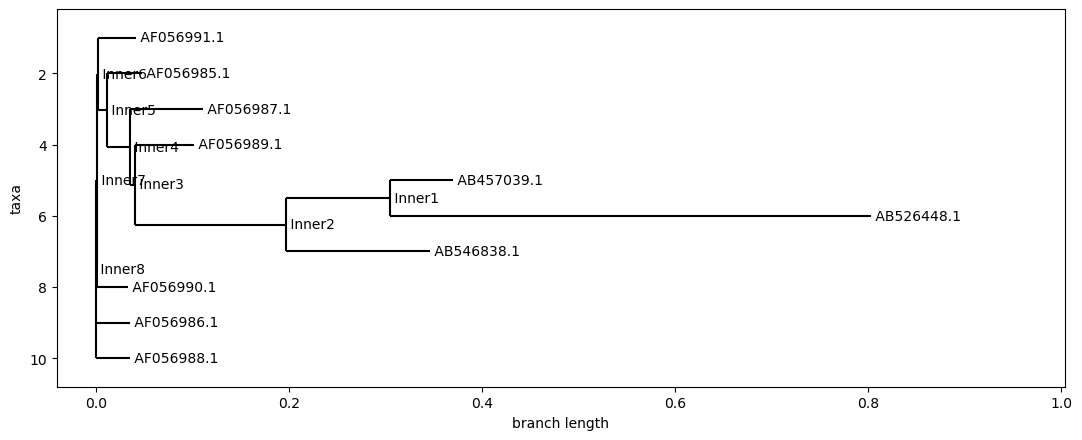

In [100]:
fig = plt.figure(figsize=(13,5), dpi=100)  
matplotlib.rc('font', size=10)              
matplotlib.rc('xtick', labelsize=10)      
matplotlib.rc('ytick', labelsize=10)       
axes = fig.add_subplot(1, 1, 1)
Phylo.draw(CSF1R_tree, axes=axes)